In [30]:
import pandas as pd
dataset = pd.read_csv(r"D:\Documents\GO.IT\facebook_ads_data.csv")

In [31]:
dataset.head()

,ad_date,campaign_name,total_spend,total_impressions,total_clicks,total_value,cpc,cpm,ctr,romi
0,2022-11-05,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
1,2022-11-01,Expansion,0.00,0,0,0.00,NaN,NaN,NaN,NaN
2,2022-10-31,Expansion,227.45,6054,58,191.87,3.92,37.57,0.009580,0.843570
3,2022-10-30,Expansion,335.91,27562,69,472.61,4.87,12.19,0.002503,1.406954
4,2022-10-29,Expansion,714.03,33358,115,680.34,6.21,21.41,0.003447,0.952817


In [37]:
dataset['ad_date'] = pd.to_datetime(dataset['ad_date'])

In [33]:
import matplotlib.pyplot as plt

In [40]:
dataset_2021 = dataset[dataset['ad_date'].dt.year == 2021]
print(dataset.dtypes)
print(dataset_2021.head())

ad_date              datetime64[ns]
campaign_name                object
total_spend                 float64
total_impressions             int64
total_clicks                  int64
total_value                 float64
cpc                         float64
cpm                         float64
ctr                         float64
romi                        float64
dtype: object
       ad_date campaign_name  total_spend  total_impressions  total_clicks  \
274 2021-12-31     Lookalike       143.19              24699           194   
275 2021-12-31        Trendy         8.82              25345            63   
276 2021-12-31     Wholesale        21.37               6705            24   
277 2021-12-30     Lookalike       227.56              44527           897   
278 2021-12-30        Trendy        31.92               8833            58   

     total_value   cpc   cpm       ctr      romi  
274       138.86  0.74  5.80  0.007855  0.969760  
275        16.32  0.14  0.35  0.002486  1.850340  
276 

In [45]:
dataset_2021_daily = dataset_2021.groupby(dataset_2021['ad_date'].dt.date).agg({
    'total_spend': 'sum',
    'romi': 'sum'
}).reset_index()

In [46]:
dataset_2021_daily.head()

,ad_date,total_spend,romi
0,2021-01-01,0.39,1.512821
1,2021-01-02,7.74,0.891473
2,2021-01-04,70.06,0.977305
3,2021-01-05,81.15,0.760074
4,2021-01-06,142.77,2.022425


# ex. 1

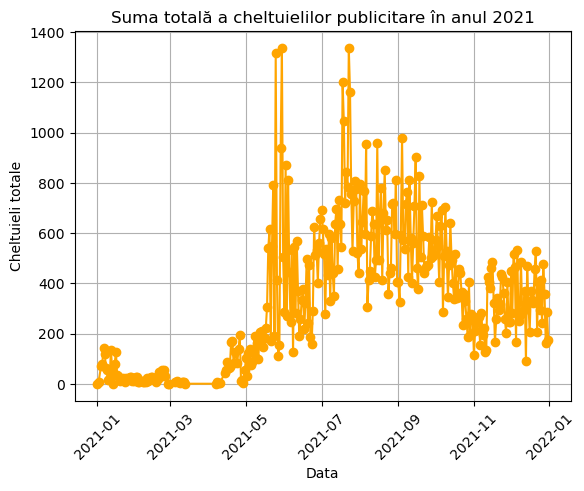

In [56]:
plt.plot(dataset_2021_daily['ad_date'], dataset_2021_daily['total_spend'], marker = 'o', color = 'orange')
plt.title('Suma totală a cheltuielilor publicitare în anul 2021')
plt.xlabel('Data')
plt.ylabel('Cheltuieli totale')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

1.1. Un grafic cu suma totală a cheltuielilor publicitare în anul 2021

Apoi: 1.2. Un grafic cu ROMI-ul zilnic în anul 2021

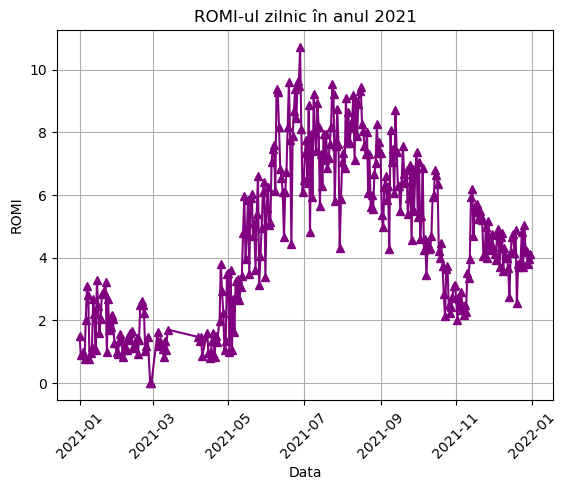

In [54]:
plt.plot(dataset_2021_daily['ad_date'], dataset_2021_daily['romi'], marker = '^', color = 'purple')
plt.title('ROMI-ul zilnic în anul 2021')
plt.xlabel('Data')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# ex. 2

In [57]:
campaigns = dataset.groupby('campaign_name').agg({
    'total_spend': 'sum',
    'romi': 'sum'
}).reset_index()

2.1. Un grafic cu suma totală a cheltuielilor publicitare pentru fiecare campanie

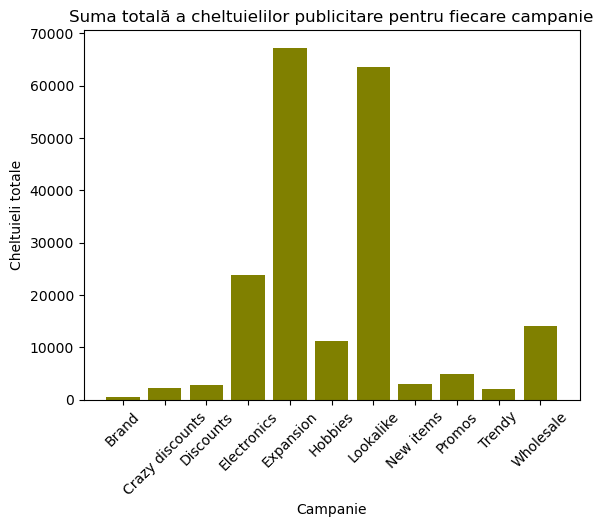

In [60]:
plt.bar(campaigns['campaign_name'], campaigns['total_spend'], color='olive')
plt.title('Suma totală a cheltuielilor publicitare pentru fiecare campanie')
plt.xlabel('Campanie')
plt.ylabel('Cheltuieli totale')
plt.xticks(rotation=45)
plt.show()

2.2. Un grafic cu ROMI-ul total pentru fiecare campanie

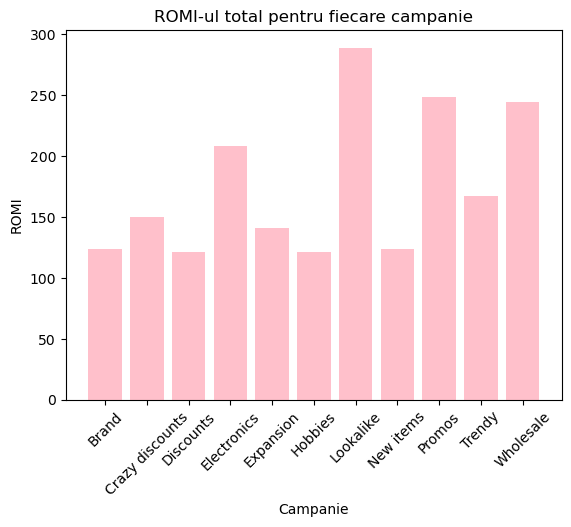

In [61]:
plt.bar(campaigns['campaign_name'], campaigns['romi'], color='pink')
plt.title('ROMI-ul total pentru fiecare campanie')
plt.xlabel('Campanie')
plt.ylabel('ROMI')
plt.xticks(rotation=45)
plt.show()

# ex. 3

In [62]:
import seaborn as sns

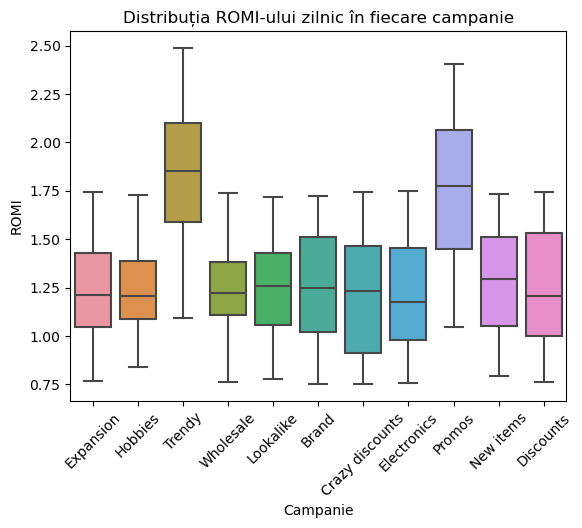

In [64]:
sns.boxplot(x='campaign_name', y='romi', data=dataset)
plt.title('Distribuția ROMI-ului zilnic în fiecare campanie')
plt.xlabel('Campanie')
plt.ylabel('ROMI')
plt.xticks(rotation=45)

plt.show()

# ex. 4

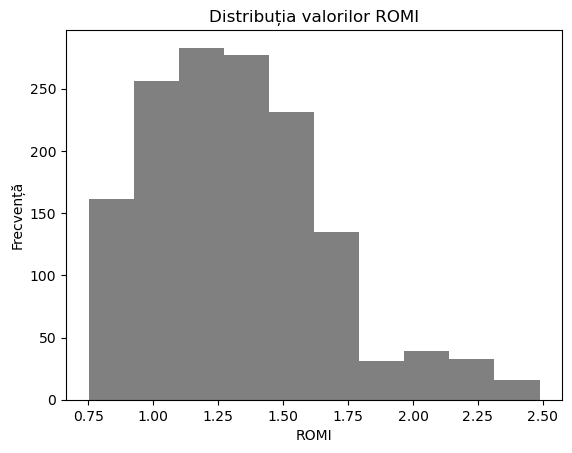

In [69]:
plt.hist(dataset['romi'], color = 'gray')
plt.title('Distribuția valorilor ROMI')
plt.xlabel('ROMI')
plt.ylabel('Frecvență')
plt.grid(False)
plt.show()

# ex. 5

In [81]:
coloane_numerice = dataset.select_dtypes(include=['number']).columns
datafr_numeric = dataset[coloane_numerice]
correlation_matrix = datafr_numeric.corr()
print(correlation_matrix)

                   total_spend  total_impressions  total_clicks  total_value  \
total_spend           1.000000           0.475607      0.480066     0.978890   
total_impressions     0.475607           1.000000      0.765489     0.472037   
total_clicks          0.480066           0.765489      1.000000     0.472124   
total_value           0.978890           0.472037      0.472124     1.000000   
cpc                   0.262254          -0.093097     -0.159521     0.250851   
cpm                   0.482027          -0.121094     -0.032829     0.471338   
ctr                  -0.025495          -0.155701      0.200440    -0.022267   
romi                 -0.114859          -0.099520     -0.101495    -0.013733   

                        cpc       cpm       ctr      romi  
total_spend        0.262254  0.482027 -0.025495 -0.114859  
total_impressions -0.093097 -0.121094 -0.155701 -0.099520  
total_clicks      -0.159521 -0.032829  0.200440 -0.101495  
total_value        0.250851  0.471338 -

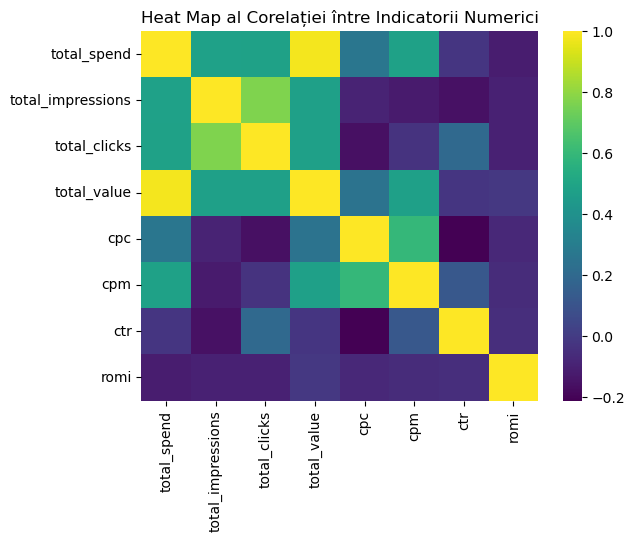

In [88]:
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Heat Map al Corelației între Indicatorii Numerici')
plt.show()

Care indicatori au cea mai mare și cea mai mică corelație? Cu ce corelează “total_value”?
Răspuns: Cea mai mare corelație o are fiecare indicator cu sine. Cea mai mică corelație există între cpc și ctr. Total value corelează cu total spend.

# ex. 6

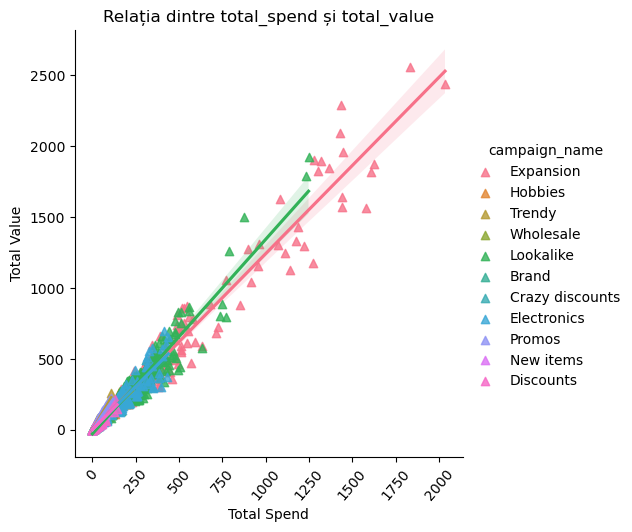

In [113]:
sns.lmplot(x='total_spend', y='total_value', data=dataset, hue = 'campaign_name', palette='husl', markers = '^')
plt.title('Relația dintre total_spend și total_value')
plt.xlabel('Total Spend')
plt.ylabel('Total Value')
plt.grid(False)
plt.xticks(rotation=50)
plt.show()